In [2]:
%matplotlib inline

import numpy as np
import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil

from nilearn import datasets


# Nodal Network Metrics

In [3]:
GICA_300ROI =  ['Parietal Memory', 'Default Mode', 'Auditory', 'Cingulo Opercular', 'Dorsal Attention', 'Fronto Parietal',
                  'Medial Temporal Lobe', 'Parieto Medial', 'Reward', 'Salience', 'Somatomotor Dorsal', 'Somatomotor Lateral',
                  'Unassigned', 'Ventral Attention', 'Visual']

atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located '
      'at: %s' % atlas_yeo_2011.thick_17)
print(atlas_yeo_2011.colors_17)
#yeo = pd.read_csv(atlas_yeo_2011.colors_17)
yeo_17 = ['Visual A', 'Visual B', 'Somatomotor A', 'Somatomotor B', 'Dorsal Attention A', 'Dorsal Attention B',
          'Salience-Ventral Attention A', 'Salience-Ventral Attention B', 'Limbic B', 'Limbic A', 'Control A',
          'Control B', 'Control C', 'Default A', 'Default B', 'Default C', 'Temporal Parietal']

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: /home/gruneco-server/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz
/home/gruneco-server/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_ColorLUT.txt


In [4]:
# AD
G1_NodalShortestPath = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/yeo_correlacion/W{w}_AD/NodalShortestPath/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# CN_AD
G2_NodalShortestPath = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_AD/yeo_correlation/W{w}_CN_AD/NodalShortestPath/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# MCI
G3_NodalShortestPath = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/MCI/yeo_correlacion/W{w}_MCI/NodalShortestPath/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# CN_MCI
G4_NodalShortestPath = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_MCI/yeo_CORRELACION/W{w}_CN_MCI/NodalShortestPath/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# GK
G5_NodalShortestPath = [[f'/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group{w}/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# GW
G6_NodalShortestPath = [[f'/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GW/partial_correlation/NodalShortestPath/Group{w}/NLp_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# len is windows[thresholds]
print(G5_NodalShortestPath)
print(G6_NodalShortestPath)

[['/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group0/NLp_Thres001.txt', '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group1/NLp_Thres001.txt', '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group2/NLp_Thres001.txt', '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group3/NLp_Thres001.txt', '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/GRAPH_RESULTS/GICA_300ROI/GK/partial_correlation/NodalShortestPath/Group4/NLp_Thres001.txt', '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_co

In [5]:
def df_threshold(g1, g2, g3, g4, g5, g6, g_names=[], roi_names=[], net_name='', name='', subname='', out='', save=True, only_stats=False):
    if len(subname)>1:
        fname_all = f'{out}{name}/{net_name}/{subname}'
    else:
        fname_all = f'{out}{name}/{net_name}/'
    if save:
        if not os.path.exists(fname_all):
            os.makedirs(fname_all)
        else:
            shutil.rmtree(fname_all)  # Removes all the subdirectories
            os.makedirs(fname_all)
    group_roi = pd.DataFrame()
    mx_anova = pd.DataFrame()
    pw_test_1 = pd.DataFrame()
    pw_test_2 = pd.DataFrame()
    all_metrics = pd.DataFrame()
    group_rois_all = []
    for th, (g1_th, g2_th, g3_th, g4_th, g5_th, g6_th) in enumerate(zip(g1, g2, g3, g4, g5, g6), start=1):
        metrics = pd.DataFrame()
        idx = []
        for w, (g1_w, g2_w, g3_w, g4_w, g5_w, g6_w) in enumerate(zip(g1_th, g2_th, g3_th, g4_th, g5_th, g6_th)):
            #print('w:', w,'th:', th,'g1:', g1_w, 'g2:', g2_w, 'g3:', g3_w, 'g4:', g4_w)
            # column: node, row: subject
            g1_df = pd.read_fwf(g1_w, sep='\t', header=None)
            g1_df.columns = roi_names
            g1_df['group'] = g_names[0]
            g1_df['window'] = w
            g1_df['threshold'] = f'Thres{th:03}'
            g2_df = pd.read_fwf(g2_w, sep='\t', header=None)
            g2_df.columns = roi_names
            g2_df['group'] = g_names[1]
            g2_df['window'] = w
            g2_df['threshold'] = f'Thres{th:03}'
            g3_df = pd.read_fwf(g3_w, sep='\t', header=None)
            g3_df.columns = roi_names
            g3_df['group'] = g_names[2]
            g3_df['window'] = w
            g3_df['threshold'] = f'Thres{th:03}'
            g4_df = pd.read_fwf(g4_w, sep='\t', header=None)
            g4_df.columns = roi_names
            g4_df['group'] = g_names[3]
            g4_df['window'] = w
            g4_df['threshold'] = f'Thres{th:03}'
            g5_df = pd.read_fwf(g5_w, sep='\t', header=None)
            g5_df.columns = roi_names
            g5_df['group'] = g_names[4]
            g5_df['window'] = w
            g5_df['threshold'] = f'Thres{th:03}'
            g6_df = pd.read_fwf(g6_w, sep='\t', header=None)
            g6_df.columns = roi_names
            g6_df['group'] = g_names[5]
            g6_df['window'] = w
            g6_df['threshold'] = f'Thres{th:03}'
            
            metrics = pd.concat([metrics, g1_df, g2_df, g3_df, g4_df, g5_df, g6_df])
            if w==0:
                idx = list(metrics.index)
        print('idx:', len(idx))
        idx = list(range(len(idx)))*(w+1)
        #print(idx)
        #print(len(idx), w)
        metrics['Subject'] = idx
        metrics['threshold'] = f'Thres{th:03}'
        metrics = metrics.replace(np.inf, 0)
        for idx_roi, roi in enumerate(roi_names):
            anovas = pd.DataFrame()
            anova = pg.mixed_anova(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', effsize='np2')
            anovas['Source'] = anova['Source'] if 'Source' in anova.columns else np.NaN
            anovas['SS'] = anova['SS'] if 'SS' in anova.columns else np.NaN
            anovas['DF1'] = anova['DF1'] if 'DF1' in anova.columns else np.NaN
            anovas['DF2'] = anova['DF2'] if 'DF2' in anova.columns else np.NaN
            anovas['MS'] = anova['MS'] if 'MS' in anova.columns else np.NaN
            anovas['F'] = anova['F'] if 'F' in anova.columns else np.NaN
            anovas['p-unc'] = anova['p-unc'] if 'p-unc' in anova.columns else np.NaN
            anovas['np2'] = anova['np2'] if 'np2' in anova.columns else np.NaN
            anovas['eps'] = anova['eps'] if 'eps' in anova.columns else np.NaN
            anovas['p-GG-corr'] = anova['p-GG-corr'] if 'p-GG-corr' in anova.columns else np.NaN
            anovas['sphericity'] = anova['sphericity'] if 'sphericity' in anova.columns else np.NaN
            anovas['W-spher'] = anova['W-spher'] if 'W-spher' in anova.columns else np.NaN
            anovas['p-spher'] = anova['p-spher'] if 'p-spher' in anova.columns else np.NaN
            anovas['threshold'] = f'Thres{th:03}'
            anovas['roi'] = roi
            anovas['metric_name'] = name
            mx_anova = pd.concat([mx_anova, anovas])
            #print(mx_anova)
            #print('pairwise_tests window')
            pw_t = pg.pairwise_tests(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', return_desc=True, padjust='bonf', effsize='cohen')
            pw_t['threshold'] = f'Thres{th:03}'
            pw_t['roi'] = roi
            pw_t['metric_name'] = name
            pw_test_1 = pd.concat([pw_test_1, pw_t])
            #print(pw_test_1)
            #print('pairwise_tests group')
            pw_t = pg.pairwise_tests(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', padjust='bonf', effsize='cohen', return_desc=True, within_first=False)
            pw_t['threshold'] = f'Thres{th:03}'
            pw_t['roi'] = roi
            pw_t['metric_name'] = name
            pw_test_2 = pd.concat([pw_test_2, pw_t])
            #print(pw_test_2)
        print(f'Th: {th}')

        group_results = pw_test_2[(pw_test_2['p-corr']<=0.05)]
        keep_tuples = [('AD', 'CN_AD'), ('AD', 'MCI'), ('CN_MCI', 'MCI'), ('CN_AD', 'CN_MCI'), ('GK', 'GW'),
                       ('GK', 'AD'), ('GK', 'MCI'), ('GK', 'CN_AD'), ('GK', 'CN_MCI'),
                       ('GW', 'AD'), ('GW', 'MCI'), ('GW', 'CN_AD'), ('GW', 'CN_MCI')]
        tuples_in_group_results = pd.MultiIndex.from_frame(group_results[['A', 'B']])
        group_results = group_results[tuples_in_group_results.isin(keep_tuples)]
        group_results = group_results[['A', 'B', 'p-unc', 'p-corr', 'BF10', 'cohen', 'threshold', 'roi']]
        print(group_results)
        #group_results.to_csv(f'{fname_all}Thres{th:03}_group_results.csv')
        group_rois = list(set(group_results[(group_results['threshold'] == f'Thres{th:03}')]['roi'].tolist()))


        group_roi = pd.concat([group_roi, group_results])
        print(group_rois)
        group_rois_all.extend(group_rois)
        if not only_stats:
            for idx_net, net in enumerate(group_rois):
                sns.set_theme(style='whitegrid')
                #sns.set(rc={'figure.figsize':(11.7,8.27)})
                cat = sns.catplot(x='window', y=net, hue='group', data=metrics, errorbar=('se', 0.5), kind='bar', height=8.27, aspect=11.7/8.27, palette=sns.color_palette(['#CEC3C1', '#FC7753', '#66D7D1', '#403D58']))
                cat.set(ylim=(0, None))
                cat.set_ylabels(name)
                cat.set_xlabels('Windows')
                cat.set(title=net)
                plt.savefig(f'{fname_all}/Thres{th:03}_{name}_{net}.png', dpi=600)

        #print(metrics[metrics['window']==1])
        all_metrics = pd.concat([all_metrics, metrics])
        #break
        print(group_rois_all)
        print(type(group_rois_all))
        group_rois_all = list(set(group_rois_all))
        print('group_rois_all', group_rois_all)

    if not only_stats:
        for idx_net, net in enumerate(group_rois_all):
            sns.set_style(style='whitegrid')
            thr = sns.catplot(data=all_metrics, x='threshold', y=net, hue='group', col='window', col_wrap=3, errorbar=('se',0.5), kind='point', height=8.27, aspect=11.7/8.27, palette=sns.color_palette(['#CEC3C1', '#FC7753', '#66D7D1', '#403D58']))
            sns.set_theme(font_scale=2)
            thr.set_xlabels('Threshold', fontsize=25)
            thr.set_ylabels(name, fontsize=25)
            thr.set_xticklabels(rotation=45)
            #thr.set(ylim=(0, None))
            plt.savefig(f'{fname_all}/Thres_all_{name}_{net}.png', dpi=600)

    if save:
        mx_anova.to_csv(f'{fname_all}/{name}_mxanova.csv')
        pw_test_1.to_csv(f'{fname_all}/{name}_pairwisetest_window.csv')
        pw_test_2.to_csv(f'{fname_all}/{name}_pairwisetest_group.csv')
        group_results.to_csv(f'{fname_all}/{name}_group_results.csv')
        #all_metrics.to_csv(f'{fname_all}_metrics.csv')
    return all_metrics, mx_anova, pw_test_1, pw_test_2, group_results

In [6]:
fout = '/media/gruneco-server/DB_GRUNECO/BIOMARCADORES_GICA_300ROI/functional_connectivity/dynamic/STATISTICS/GRAPHS/'

In [7]:
all_metrics_gica_corr, mx_anova_gica_corr, pw_test_1_gica_corr, pw_test_2_gica_corr, group_results_gica_corr = df_threshold(G5_NodalShortestPath, G6_NodalShortestPath, g_names=['GK', 'GW'], roi_names=GICA_300ROI, net_name='GICA_300ROI', name='NodalShortestPath', subname='partial_correlation', out=fout, save=True, only_stats=False)

TypeError: df_threshold() missing 2 required positional arguments: 'g3' and 'g4'

In [52]:
all_metrics_gica_corr

,Parietal Memory,Default Mode,Auditory,Cingulo Opercular,Dorsal Attention,Fronto Parietal,Medial Temporal Lobe,Parieto Medial,Reward,Salience,Somatomotor Dorsal,Somatomotor Lateral,Unassigned,Ventral Attention,Visual,group,window,threshold,Subject
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,AD,0,Thres001,0
1,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,AD,0,Thres001,1
2,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,AD,0,Thres001,2
3,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AD,0,Thres001,3
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AD,0,Thres001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1.005037,0.000000,3.308150,0.935256,3.480769,2.861447,17.550549,3.595238,16.491300,1.301923,2.630037,1.533333,0.000000,1.301923,1.005037,CN_MCI,10,Thres010,259
53,0.276923,0.342857,1.893939,0.276923,1.431818,1.296703,0.660256,1.441342,6.281202,4.220596,16.370246,5.697786,7.535315,2.420862,6.853230,CN_MCI,10,Thres010,260
54,0.808171,7.139394,2.461905,6.267965,3.962175,1.541504,5.507846,3.200271,8.529275,1.280952,1.793452,1.285714,2.245238,6.406494,4.569643,CN_MCI,10,Thres010,261
55,2.416667,4.616667,6.151190,6.902381,1.208333,4.086905,5.259524,3.119048,2.942857,8.519048,1.366667,2.619048,3.083333,2.175000,4.533333,CN_MCI,10,Thres010,262


# Global Network Metrics

In [121]:
# AD
G1_NetworkEfficiency = [f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W{w}_ALL_AD/Hierarchy/b_All_Thres.txt' for w in range(11)]

# CN_AD
G2_NetworkEfficiency = [f'//home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_AD/GICA_300ROI_correlation/W{w}_ALL_CN_AD/Hierarchy/b_All_Thres.txt' for w in range(11)]

# MCI
G3_NetworkEfficiency = [f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/MCI/GICA_300ROI_correlacion/W{w}_MCI/Hierarchy/b_All_Thres.txt' for w in range(11)]

# CN_MCI
G4_NetworkEfficiency = [f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_MCI/GICA_300ROI_CORRELACION/W{w}_CN_MCI/Hierarchy/b_All_Thres.txt' for w in range(11)]

print(G1_NetworkEfficiency)
print(G3_NetworkEfficiency)

['/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W0_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W1_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W2_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W3_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W4_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W5_ALL_AD/Hierarchy/b_All_Thres.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correl

In [125]:
def df_global_threshold(g1, g2, g3, g4, g_names=[], net_name='', name='', subname='', out='', save=True, only_stats=False):

    if len(subname)>1:
        fname_all = f'{out}{name}/{net_name}/{subname}'
    else:
        fname_all = f'{out}{name}/{net_name}/'
    if save:
        if not os.path.exists(fname_all):
            os.makedirs(fname_all)
        else:
            shutil.rmtree(fname_all)  # Removes all the subdirectories
            os.makedirs(fname_all)
    print('fout: ', fout)
    mx_anova = pd.DataFrame()
    pw_test_1 = pd.DataFrame()
    pw_test_2 = pd.DataFrame()
    metrics = pd.DataFrame()
    all_metrics = pd.DataFrame()
    idx = []
    for w, (g1_w, g2_w, g3_w, g4_w) in enumerate(zip(g1, g2, g3, g4)):
        print('w: ', w)
        g1_df = pd.read_fwf(g1_w, sep='\t', header=None)
        g1_df.columns = [str(round(i,2)) for i in np.arange(0.05, 55/100, 0.05)]   # Thresholds (Sparsity values)
        g1_df['group'] = g_names[0]
        g1_df['window'] = w
        g2_df = pd.read_fwf(g2_w, sep='\t', header=None)
        g2_df.columns = [str(round(i,2)) for i in np.arange(0.05, 55/100, 0.05)]   # Thresholds (Sparsity values)
        g2_df['group'] = g_names[1]
        g2_df['window'] = w
        g3_df = pd.read_fwf(g3_w, sep='\t', header=None)
        g3_df.columns = [str(round(i,2)) for i in np.arange(0.05, 55/100, 0.05)]   # Thresholds (Sparsity values)
        g3_df['group'] = g_names[2]
        g3_df['window'] = w
        g4_df = pd.read_fwf(g4_w, sep='\t', header=None)
        g4_df.columns = [str(round(i,2)) for i in np.arange(0.05, 55/100, 0.05)]   # Thresholds (Sparsity values)
        g4_df['group'] = g_names[3]
        g4_df['window'] = w
        #print(g2_df)
        metrics = pd.concat([metrics, g1_df, g2_df, g3_df, g4_df])
        #print(metrics)
        if w==0:
            idx = list(metrics.index)

    print('idx:', len(idx))
    idx = list(range(len(idx)))*(w+1)
    #print(idx)
    #print(len(idx), w)
    metrics['Subject'] = idx
    metrics = metrics.replace(np.inf, 0)#.replace(np.nan, 0)#.replace(np.nan, metrics.mean())
    print(metrics)
    for idx_th, th in enumerate([str(round(i,2)) for i in np.arange(0.05, 55/100, 0.05)] ):
        anovas = pd.DataFrame()
        anova = pg.mixed_anova(data=metrics, dv=th, between='group', within='window', subject='Subject', effsize='np2')
        anovas['Source'] = anova['Source'] if 'Source' in anova.columns else np.NaN
        anovas['SS'] = anova['SS'] if 'SS' in anova.columns else np.NaN
        anovas['DF1'] = anova['DF1'] if 'DF1' in anova.columns else np.NaN
        anovas['DF2'] = anova['DF2'] if 'DF2' in anova.columns else np.NaN
        anovas['MS'] = anova['MS'] if 'MS' in anova.columns else np.NaN
        anovas['F'] = anova['F'] if 'F' in anova.columns else np.NaN
        anovas['p-unc'] = anova['p-unc'] if 'p-unc' in anova.columns else np.NaN
        anovas['np2'] = anova['np2'] if 'np2' in anova.columns else np.NaN
        anovas['eps'] = anova['eps'] if 'eps' in anova.columns else np.NaN
        anovas['p-GG-corr'] = anova['p-GG-corr'] if 'p-GG-corr' in anova.columns else np.NaN
        anovas['sphericity'] = anova['sphericity'] if 'sphericity' in anova.columns else np.NaN
        anovas['W-spher'] = anova['W-spher'] if 'W-spher' in anova.columns else np.NaN
        anovas['p-spher'] = anova['p-spher'] if 'p-spher' in anova.columns else np.NaN
        anovas['threshold'] = f'Thres{idx_th:03}'
        anovas['metric_name'] = name
        mx_anova = pd.concat([mx_anova, anovas])
        #print(mx_anova)

        #print('post-hoc')
        pw_t = pg.pairwise_tests(data=metrics, dv=th, between='group', within='window', subject='Subject',
                                 return_desc=True, padjust='bonf', effsize='cohen')
        pw_t['threshold'] = f'Thres{idx_th:03}'
        pw_t['metric_name'] = name
        pw_test_1 = pd.concat([pw_test_1, pw_t])
        #print(pw_test_1)
        pw_t = pg.pairwise_tests(data=metrics, dv=th, between='group',
                                 within='window', subject='Subject', padjust='bonf', effsize='cohen', return_desc=True,
                                 within_first=False)
        pw_t['threshold'] = f'Thres{idx_th:03}'
        pw_t['metric_name'] = name
        pw_test_2 = pd.concat([pw_test_2, pw_t])

    all_metrics = pd.concat([all_metrics, metrics])
    group_results = pw_test_2[(pw_test_2['p-corr'] <= 0.05)]
    keep_tuples = [('AD', 'CN_AD'), ('AD', 'MCI'), ('CN_MCI', 'MCI'), ('CN_AD', 'CN_MCI')]
    tuples_in_group_results = pd.MultiIndex.from_frame(group_results[['A', 'B']])
    group_results = group_results[tuples_in_group_results.isin(keep_tuples)]
    group_results = group_results[['A', 'B', 'p-unc', 'p-corr', 'BF10', 'cohen', 'threshold']]
    #print(group_results)

    if not only_stats:
        all_metrics_melt = pd.melt(all_metrics, id_vars=['window', 'group', 'Subject'])
        #for idx_w, w in enumerate(list(set(all_metrics['window'].tolist()))):
        sns.set_style(style='whitegrid')
        thr = sns.catplot(data=all_metrics_melt, x='variable', y='value', hue='group', col='window', col_wrap=3,
                          errorbar=('se', 0.5), kind='point', height=8.27, aspect=11.7 / 8.27,
                          palette=sns.color_palette(['#CEC3C1', '#FC7753', '#66D7D1', '#403D58']))
        sns.set_theme(font_scale=2)
        thr.set_xlabels('Sparsity', fontsize=25)
        thr.set_ylabels(name, fontsize=25)
        thr.set_xticklabels(rotation=45)
        plt.savefig(f'{fname_all}/{name}_all_windows.png', dpi=600)

    if save:
        print('saving...')
        #print(f'{fname_all}/{name}_mxanova.csv')
        mx_anova.to_csv(f'{fname_all}/{name}_mxanova.csv')
        pw_test_1.to_csv(f'{fname_all}/{name}_pairwisetest_window.csv')
        pw_test_2.to_csv(f'{fname_all}/{name}_pairwisetest_group.csv')
        group_results.to_csv(f'{fname_all}/{name}_group_results.csv')
        print('Done')
        #all_metrics.to_csv(f'{fname_all}_metrics.csv')
    return all_metrics, mx_anova, pw_test_1, pw_test_2, group_results



fout:  /home/kevrodz/Documents/Master/functional_connectivity/dynamic/STATISTICS/GRAPHS/
w:  0
w:  1
w:  2
w:  3
w:  4
w:  5
w:  6
w:  7
w:  8
w:  9
w:  10
idx: 264
        0.05       0.1      0.15       0.2      0.25       0.3      0.35  \
0   0.000000  2.709511  1.521586  1.753552  0.505301  0.217444 -0.314464   
1   2.709511  1.244684  0.498426  0.440705  0.142820  0.451621  0.337937   
2   0.000000  1.066812  0.660391  0.420656  0.663363  0.212734  0.409080   
3   2.709511  1.839776  1.238593  0.869550  0.703488  0.192014  0.109777   
4   0.000000  0.000000  1.751503  1.543234  0.959229  0.405086  0.357469   
..       ...       ...       ...       ...       ...       ...       ...   
52  0.000000  1.794875  1.177558  0.572323  0.145035  0.053523 -0.346553   
53  0.000000  2.584963  1.401780  0.660361  0.878945  0.605138  0.549906   
54  0.000000  1.569837  1.011086  1.127335  0.623911  0.598286  0.248224   
55  0.000000  2.142864  1.658772  0.458584  0.304877 -0.854184 -0.755550   

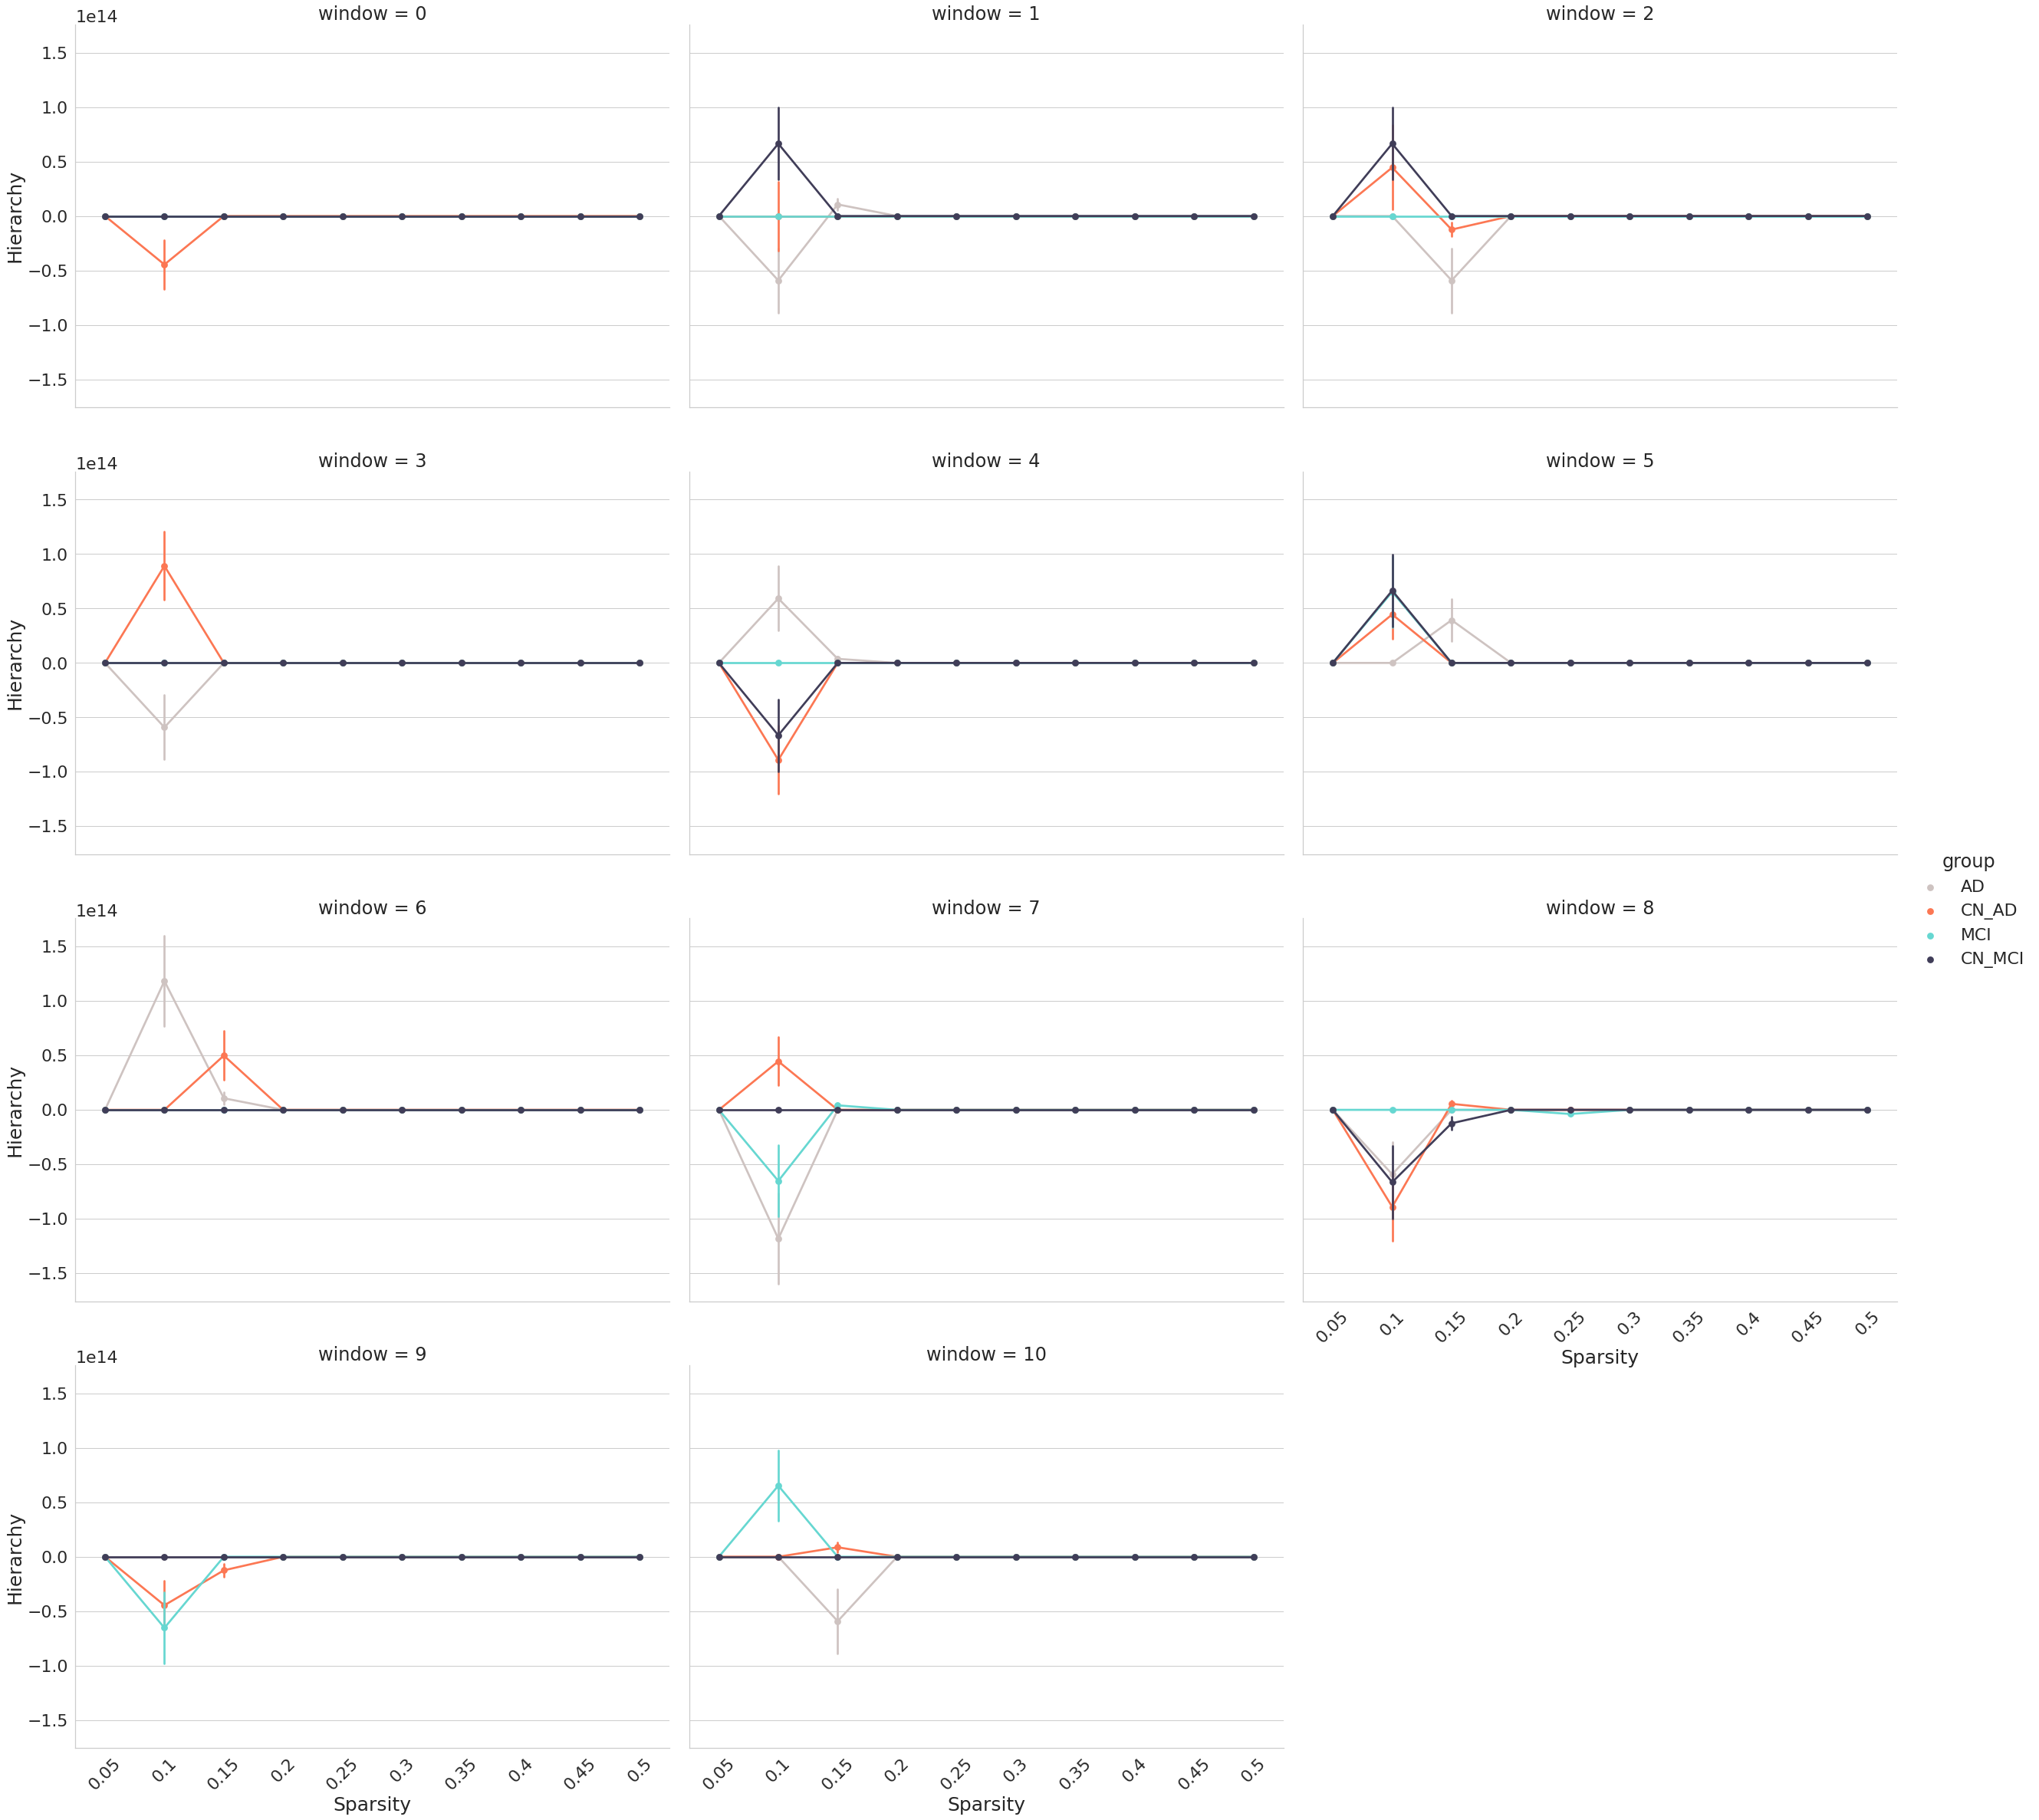

In [124]:
all_metrics_gica_corr_global, mx_anova_gica_corr_global, pw_test_1_gica_corr_global, pw_test_2_gica_corr_global, group_results_gica_corr_global = df_global_threshold(G1_NetworkEfficiency, G2_NetworkEfficiency, G3_NetworkEfficiency, G4_NetworkEfficiency, g_names=['AD', 'CN_AD', 'MCI', 'CN_MCI'], net_name='GICA_300ROI', name='Hierarchy', subname='correlation', out=fout, save=True, only_stats=False)

In [ ]:
all_metrics_gica_corr_rich_club, mx_anova_gica_corr_rich_club, pw_test_1_gica_corr_rich_club, pw_test_2_gica_corr_rich_club, group_results_gica_corr_rich_club =df_rich_club_threshold(G1_NetworkEfficiency, G2_NetworkEfficiency, G3_NetworkEfficiency, G4_NetworkEfficiency, g_names=['AD', 'CN_AD', 'MCI', 'CN_MCI'], net_name='GICA_300ROI', name='RichClub', subname='correlation', out=fout, save=True, only_stats=False)

In [53]:
df = pd.read_excel('/home/kevrodz/Documents/Master/scripts/ADNI3_OASIS3_demographics_filenames.xlsx')
df.head()

,ID,SEXO,EDAD,APOE,MMSE,CDR_total,CDR_SOB,Escolaridad,Scanner,status,centro,rs_fmri
0,6264,M,56.5,44.0,19,1.0,4.5,12,siemens,AD,ADNI3,dswauADNI_003_S_6264.nii
1,6833,F,87.1,NaN,23,0.5,4.5,16,siemens,AD,ADNI3,dswauADNI_003_S_6833_.nii
2,6712,M,90.6,NaN,19,1.0,7.0,17,philips,AD,ADNI3,dswauADNI_019_S_6712.nii
3,6013,F,60.4,33.0,23,1.0,5.5,12,siemens,AD,ADNI3,dswauADNI_022_S_6013_.nii
4,6690,F,67.8,NaN,20,1.0,6.0,14,siemens,AD,ADNI3,dswauADNI_082_S_6690_.nii


In [57]:
X = np.random.rand(80, 10000)
Y = np.random.rand(80, 10)

groups = [20, 20]
n_cond = 2
from pyls import behavioral_pls

bpls = behavioral_pls(X, Y, groups=groups, n_cond=n_cond, random_state=None)
bpls

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(

Running bootstraps:  92%|#########2| 4605/5000 | 32:41<02:00/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/sklearn/utils/extmath.py:369: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly dependin

PLSResults(x_weights, y_weights, x_scores, y_scores, y_loadings, singvals, varexp, permres, bootres, cvres, inputs)

In [58]:
help(bpls)

Help on PLSResults in module pyls.structures object:

class PLSResults(pyls.utils.ResDict)
 |  PLSResults(**kwargs)
 |  
 |  Dictionary-like object containing results of PLS analysis
 |  
 |  Attributes
 |  ----------
 |  x_weights : (B, L) `numpy.ndarray`
 |      Weights of `B` features used to project `X` matrix into PLS-derived
 |      component space
 |  y_weights : (J, L) `numpy.ndarray`
 |      Weights of `J` features used to project `Y` matrix into PLS-derived
 |      component space; not available with :func:`.pls_regression`
 |  x_scores : (S, L) `numpy.ndarray`
 |      Projection of `X` matrix into PLS-derived component space
 |  y_scores : (S, L) `numpy.ndarray`
 |      Projection of `Y` matrix into PLS-derived component space
 |  y_loadings : (J, L) `numpy.ndarray`
 |      Covariance of features in `Y` with projected `x_scores`
 |  singvals : (L, L) `numpy.ndarray`
 |      Singular values for PLS-derived component space; not available with
 |      :func:`.pls_regression`
 |

In [63]:
bpls.varexp

array([0.06362792, 0.05777495, 0.05732555, 0.05553941, 0.04856438,
       0.04675481, 0.04427017, 0.04219669, 0.03752102, 0.03584195,
       0.03512233, 0.03403804, 0.03095672, 0.03023029, 0.02981565,
       0.02852587, 0.02610087, 0.02592385, 0.02370033, 0.0235853 ,
       0.02193791, 0.021661  , 0.01888176, 0.01850579, 0.01703609,
       0.01660046, 0.01626028, 0.01159282, 0.0113628 , 0.01100994,
       0.00962854, 0.00874823, 0.00688753, 0.00681692, 0.00625932,
       0.00561396, 0.00417771, 0.00339151, 0.00327717, 0.00293417])